# Récupérer les données Velib et les visualiser

La société JCDecaux met à disoposition les données Velib pour toutes les villes dont il gère le service (Paris, Besançon, Nantes, Lyon, ...). Les données sont accessibles en temps réel via une API assez simple : [JCDecaux Developer](https://developer.jcdecaux.com/#/home). Le module [pyensae](http://www.xavierdupre.fr/app/pyensae/helpsphinx/index.html) inclut désormais la classe [DataVelibCollect](http://www.xavierdupre.fr/app/pyensae/helpsphinx/pyensae/datasource/data_velib.html?highlight=velib#datasource.data_velib.DataVelibCollect) qui permet de récupérer ces données et d'effectuer quelques traitements simples.

Tout d'abord, il est nécessaire d'obtenir une clé en vous enregistrant sur le site de JCDecaux : [Votre compte développeur](https://developer.jcdecaux.com/#/signup). Le code suivant permet de récupérer des données pendant 5 minutes :

In [1]:
from pyensae.datasource import DataVelibCollect
import os
import datetime
folder = r"c:\temp\data_velib"
if not os.path.exists(folder): os.makedirs(folder)

In [7]:
stop = datetime.datetime.now() + datetime.timedelta(minutes=5)

DataVelibCollect.run_collection ("<your key>",
            contract = "Besancon",
            folder_file = folder + "/besancon",
            stop_datetime = stop)  # remplace par None pour récupérer les données sans s'arrêter

DataVelib.collecting_data:  1  times:  2014-05-24 01:16:14.395623  delay =  0:01:00 next 2014-05-24 01:17:14.395623  delays  1.2
DataVelib.collecting_data:  2  times:  2014-05-24 01:17:15.881451  delay =  0:01:00 next 2014-05-24 01:18:14.395623  delays  1.2
DataVelib.collecting_data:  3  times:  2014-05-24 01:18:16.125755  delay =  0:01:00 next 2014-05-24 01:19:14.395623  delays  1.2
DataVelib.collecting_data:  4  times:  2014-05-24 01:19:16.434100  delay =  0:01:00 next 2014-05-24 01:20:14.395623  delays  1.2
DataVelib.collecting_data:  5  times:  2014-05-24 01:20:15.824168  delay =  0:01:00 next 2014-05-24 01:21:14.395623  delays  1.2


On liste les fichiers dans le répertoire :

In [8]:
os.listdir(folder)

['besancon.2014-05-24_01-16-14.395623.txt',
 'besancon.2014-05-24_01-17-15.881451.txt',
 'besancon.2014-05-24_01-18-16.125755.txt',
 'besancon.2014-05-24_01-19-16.434100.txt',
 'besancon.2014-05-24_01-20-15.824168.txt']

On construit un DataFrame à partir de ces données :

In [2]:
df = DataVelibCollect.to_df(folder, "^besancon.*[.]txt")
df.to_csv(os.path.join(folder, "resume_besancon.txt"), sep="\t", index=False, encoding="utf8")
df.to_excel(os.path.join(folder, "resume_besancon.xlsx"), index=False)
df[["name","lng","lat","collect_date","available_bike_stands","available_bikes","file"]].head()

,name,lng,lat,collect_date,available_bike_stands,available_bikes,file
0,14 - JACOBINS,6.033465,47.234142,2014-05-24 01:16:14.642690,1,9,besancon.2014-05-24_01-16-14.395623.txt
1,23 - RIVOTTE,6.035136,47.232098,2014-05-24 01:16:14.642690,0,11,besancon.2014-05-24_01-16-14.395623.txt
2,16 - GARE D'EAU,6.022843,47.232140,2014-05-24 01:16:14.642690,1,9,besancon.2014-05-24_01-16-14.395623.txt
3,30 - XAVIER MARMIER,6.006690,47.241256,2014-05-24 01:16:14.642690,10,2,besancon.2014-05-24_01-16-14.395623.txt
4,02 - SQUARE BOUCHOT,6.022070,47.242990,2014-05-24 01:16:14.642690,2,8,besancon.2014-05-24_01-16-14.395623.txt


On visualise les données pour une date donnée :

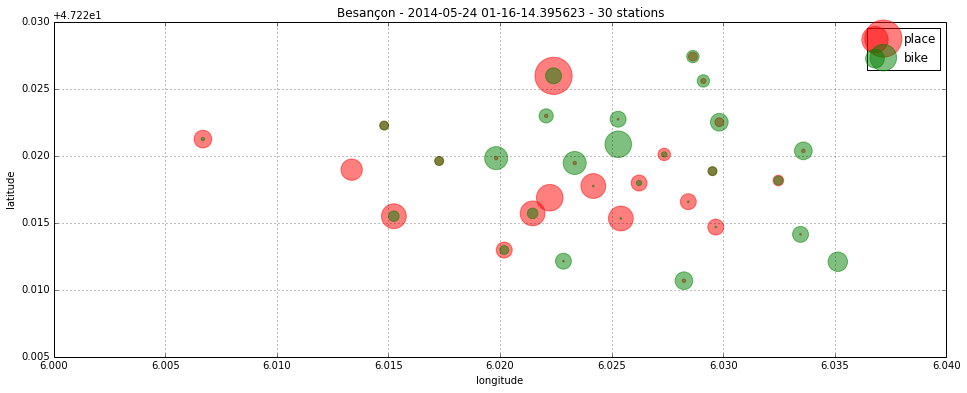

In [3]:
dt = df["file"][0]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataVelibCollect.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","").replace(".txt","").replace("_", " "), len(subset)))

On crée une petite animation avec les données velib :


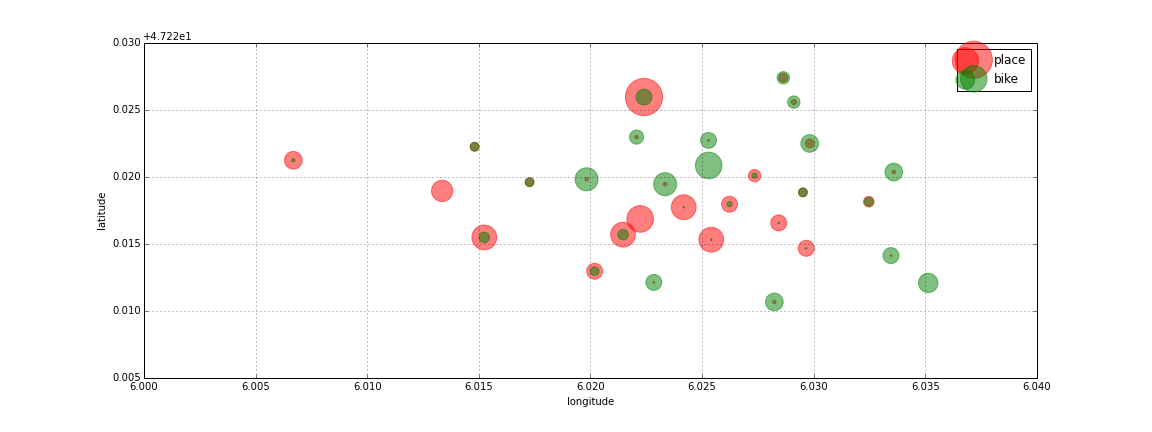
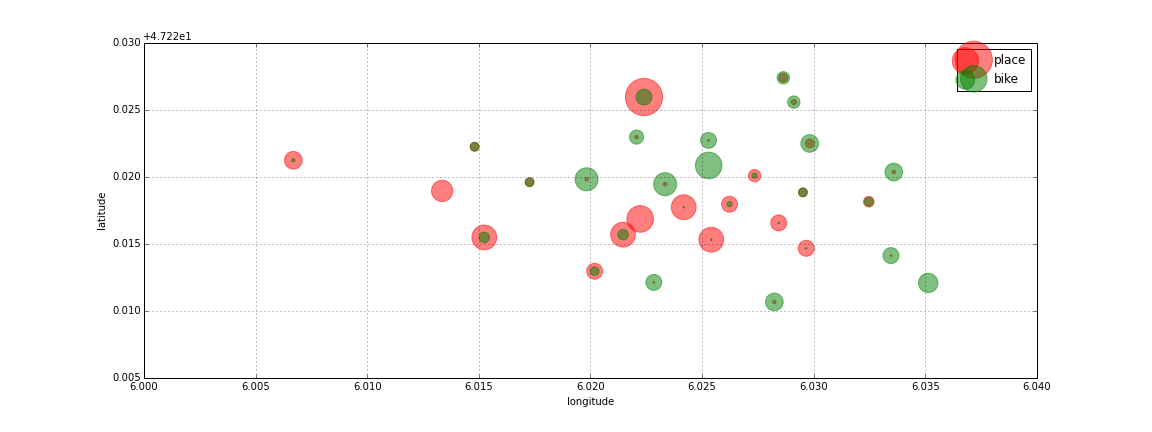
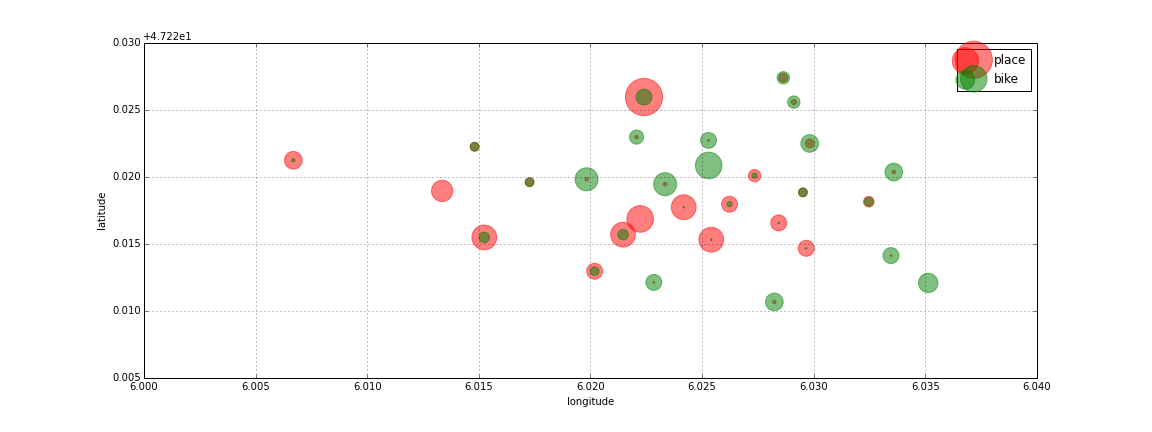
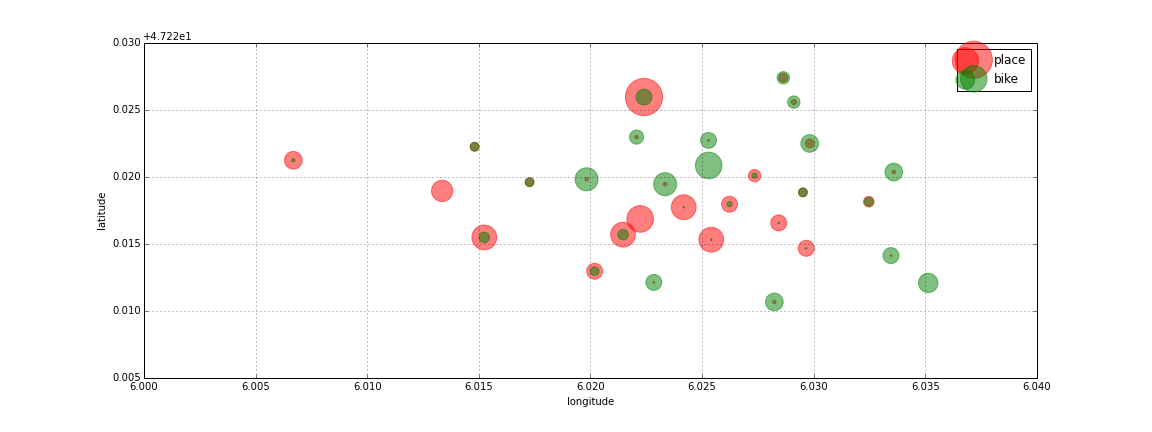
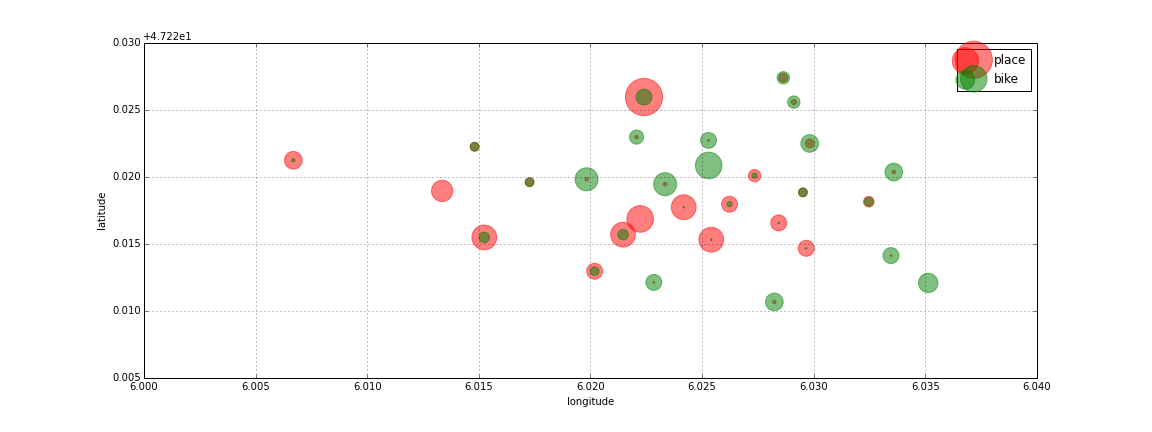

In [3]:
try :
    from JSAnimation import IPython_display
except ImportError:
    # JSAnimation import available at https://github.com/jakevdp/JSAnimation
    import pymyinstall
    pymyinstall.ModuleInstall("JSAnimation", "github", "jakevdp").install(temp_folder="c:\\temp")
    # if it produces an error, try again

DataVelibCollect.js_animation(df, interval = 100, figsize=(16,6))
# it does not work well yet

Ca ne bouge pas trop. Sur cinq minutes, c'est plutôt attendu. On essaye sur plus de données.

In [5]:
from pyensae import download_data
import pandas
download_data('besancon.df.txt.zip', website = 'xdtd', whereTo = "c:\\temp")  
df = pandas.read_csv(r"c:\temp\besancon.df.txt",sep="\t",encoding="utf8")
len(df)
# la simulation avec matploblib ne fonctionne pas avec autant d'image
#DataVelibCollect.js_animation(df, interval = 100, figsize=(16,6))

22650

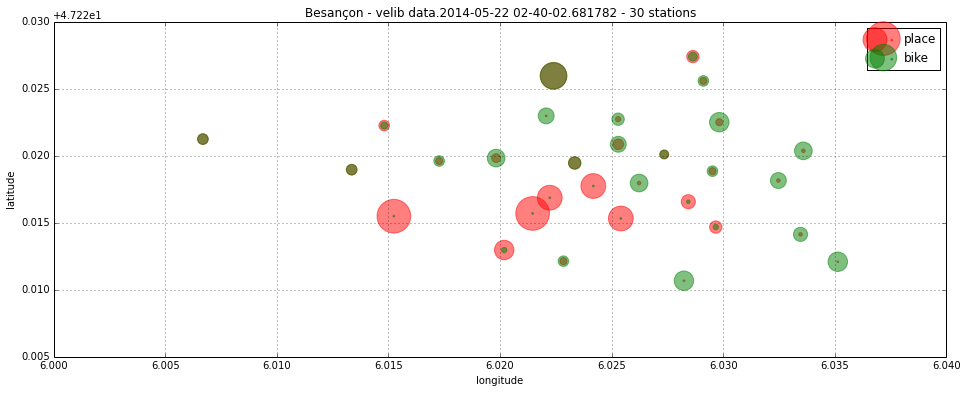

In [6]:
# première image des données
dt = df["file"][0]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataVelibCollect.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","").replace(".txt","").replace("_", " "), len(subset)))

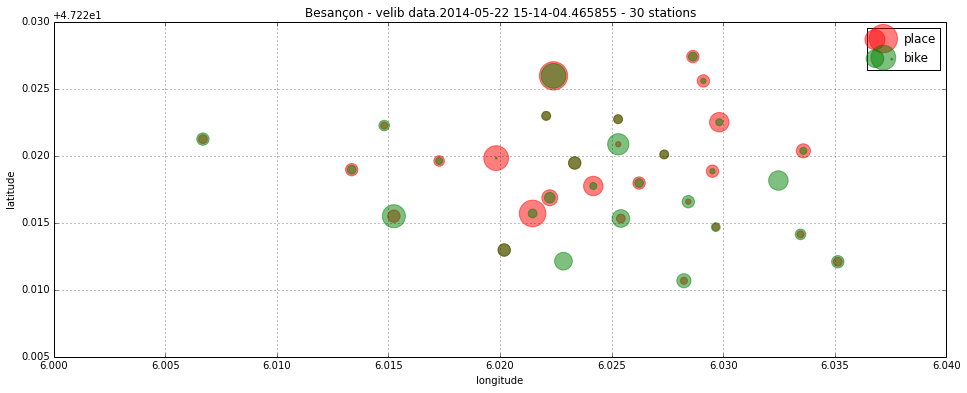

In [8]:
# dernière image
dt = df["file"][len(df)-1]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataVelibCollect.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","").replace(".txt","").replace("_", " "), len(subset)))

Vous trouverez un exemple d'utilisation de ces données ici [Coding Party 22 mai 2014 : inférer des trajectoires de vélos](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/coding_party_1.html) et là [Déterminer la vitesse moyenne des vélib](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/expose_velib.html).